# Задание

### Основная часть

* Попробовать построить все графики из тех, что были на уроке по Seaborn
* Попробовать графики из тех, что были на уроке в Matplotlib и Plotly

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm
from pylab import rcParams

In [2]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
age                    50000 non-null int64
gender                 49277 non-null object
city_type              50000 non-null object
full_mob               50000 non-null int64
ml_balance             50000 non-null float64
cl_balance_0m          50000 non-null float64
loan_balance_0m        50000 non-null float64
td_balance_0m          50000 non-null float64
casa_balance_0m        50000 non-null float64
dc_trx_cnt             50000 non-null int64
dc_trx_sum             50000 non-null float64
income                 50000 non-null float64
min_casa_balance_1q    50000 non-null float64
max_casa_balance_1q    50000 non-null float64
avg_casa_balance_1Y    50000 non-null float64
min_td_balance_1q      50000 non-null float64
max_td_balance_1q      50000 non-null float64
avg_td_balance_1Y      50000 non-null float64
min_loan_balance_1q    50000 non-null float64
max_loan_balance_1q    50

In [6]:
#вычисляем среднюю сумму ипотеки по возрасту
groups = df.groupby([df['age']])
a = groups.ml_balance.mean().where(groups.ml_balance.mean() > 0)
a


age
4              NaN
8              NaN
9              NaN
10             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26      209.837771
27     2502.118197
28     1403.729633
29     6376.667995
30     9512.515759
31     9988.037393
32    11054.234536
33    16553.060700
34    13627.390939
35    15748.381948
36    11122.378313
37    17994.695107
38    22504.656723
          ...     
63             NaN
64      418.032700
65             NaN
66             NaN
67             NaN
68             NaN
69             NaN
70             NaN
71             NaN
72             NaN
73             NaN
74             NaN
75             NaN
76             NaN
77             NaN
78             NaN
79             NaN
80             NaN
81             NaN
82             NaN
83             NaN
84      

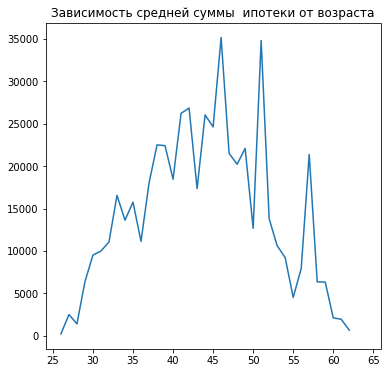

In [7]:
plt.plot(a)
rcParams['figure.figsize'] = 6,6
plt.title('Зависимость средней суммы  ипотеки от возраста')
plt.show()

In [ ]:
#Средний размер транзакции от пола

In [8]:
groups2 = df.groupby([df['gender']])
a2 = groups2.Avg_trx.mean()
a2


gender
F    4590.102516
М    5793.717131
Name: Avg_trx, dtype: float64

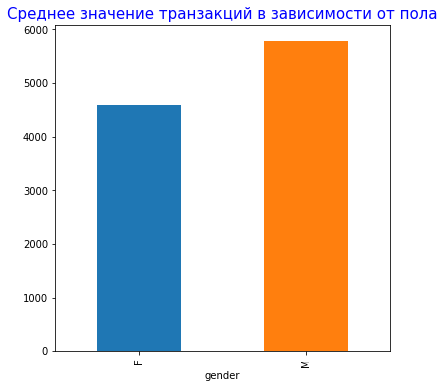

In [14]:
a2.plot(kind='bar')
plt.title('Среднее значение транзакций в зависимости от пола' , size=15, color='b')
plt.show()

In [ ]:
## средняя сумма потреб кредитов в зависимости от типа города

In [38]:
groups3 = df.groupby([df['city_type']])
a3 = groups3.cl_balance_0m.mean()
a3


city_type
100-500     67425.976933
1M+         56129.776859
500-1000    56742.027056
<100        63142.912135
Mega        53533.495433
Name: cl_balance_0m, dtype: float64

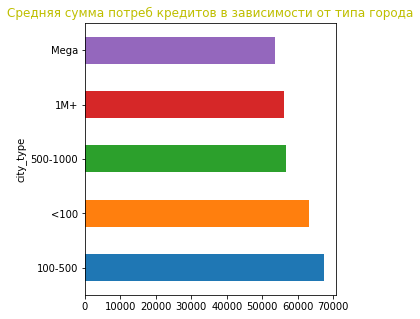

In [41]:
a3.sort_values(ascending=False).plot(kind='barh')
plt.title('Cредняя сумма потреб кредитов в зависимости от типа города' , size=12, color='y')
plt.show()

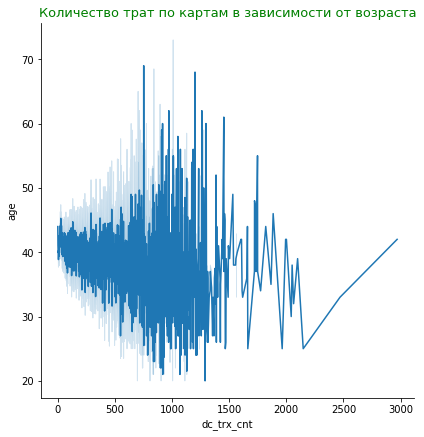

In [69]:
sns.relplot(x='dc_trx_cnt', y='age',height=6, data=df, kind='line')

plt.title('Количество трат по картам в зависимости от возраста', size=13, color='g');

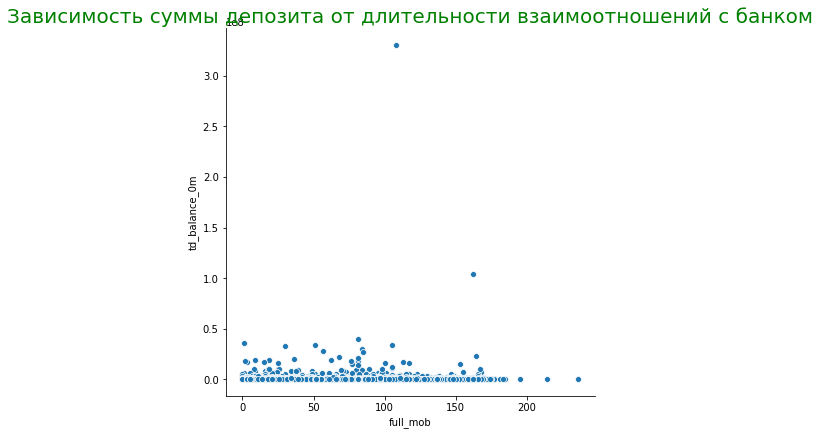

In [54]:
sns.relplot(x='full_mob', y='td_balance_0m', height=6, data=df, kind='scatter')
plt.title('Зависимость суммы депозита от длительности взаимоотношений с банком', size=20, color='g');

Text(0.5, 1.0, 'Зависимость суммы депозита от размера города c учетом пола')

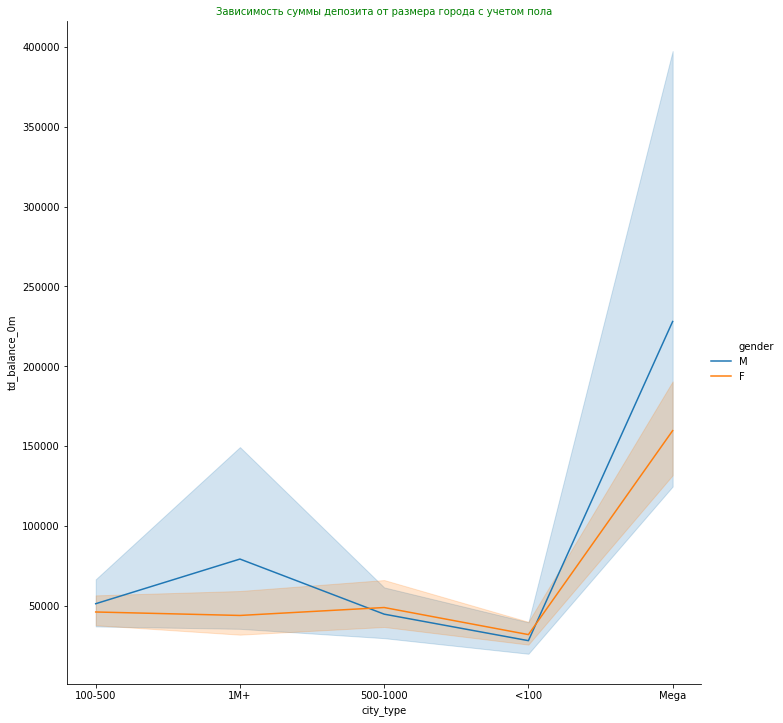

In [63]:
sns.relplot(x='city_type', y = 'td_balance_0m', height=10, hue='gender', data=df, kind='line')  
plt.title('Зависимость суммы депозита от размера города c учетом пола', size=10, color='g')

In [77]:
groups_city = df.groupby([df['city_type']])
a = groups_city.cl_balance_0m.mean()
a_city = pd.DataFrame(a)
a_city['ml_balance'] = groups_city.ml_balance.mean()
a_city

,cl_balance_0m,ml_balance
city_type,,
100-500,67425.976933,10124.896902
1M+,56129.776859,17193.745653
500-1000,56742.027056,10097.149888
<100,63142.912135,7644.066770
Mega,53533.495433,23568.911413


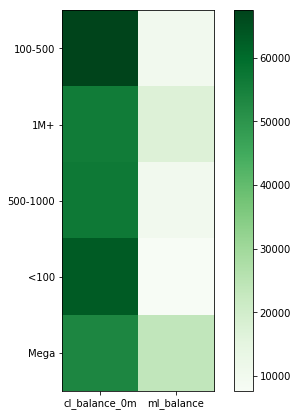

In [78]:
# тепловая карта 

plt.figure(figsize=(7, 7))
plt.imshow(a_city, cmap='Greens')
plt.colorbar()  # добавим шкалу интенсивности цвета

plt.xticks(range(len(a_city.columns)), a_city.columns)
plt.yticks(range(len(a_city)), a_city.index);

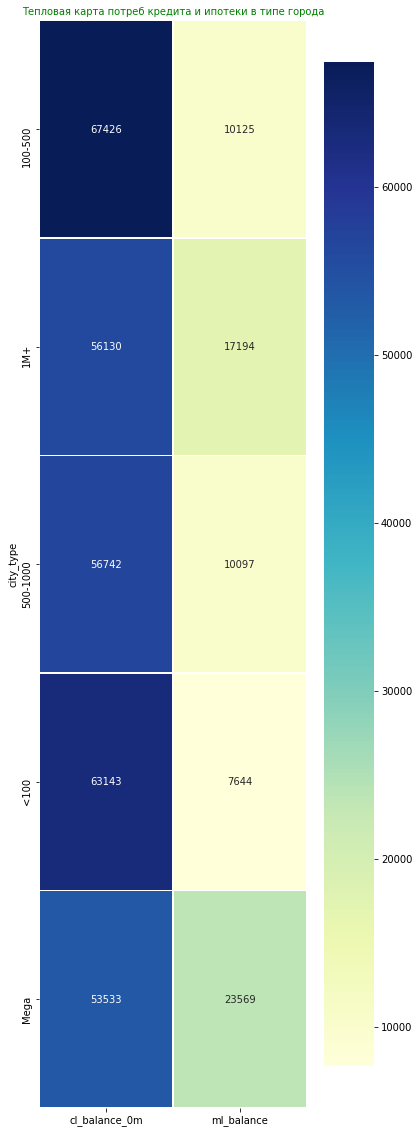

In [81]:
sns.heatmap(
    a_city, 
    annot=True, 
    fmt='.0f',
    linewidths=.5, 
    cmap="YlGnBu")
plt.title('Тепловая карта потреб кредита и ипотеки в типе города', size=10, color='g')
plt.show()